In [11]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from Functions.visualization_functions import *

In [12]:
# TODO change the path to the csv files
# Runs to compare
df_ppo = pd.read_csv('Data/2024-12-04_environment_data_PPO_save.csv')
# df_a2c = pd.read_csv('Data/2024-12-03_environment_data_A2C.csv')
df_ddpg = pd.read_csv('Data/2024-12-04_environment_data_DDPG.csv')
df_heuristic = pd.read_csv('Data/2024-12-05_environment_data_heuristic.csv')
df_greedy = pd.read_csv('Data/2024-12-04_environment_data_greedy.csv')
df_fixed = pd.read_csv('Data/2024-12-04_environment_data_fixed_order.csv')

# Dataframes to compare
df_rl = [df_ppo, df_ddpg]
# df_all = [df_ppo, df_a2c, df_ddpg, df_heuristic, df_greedy]
df_all = [df_ppo, df_ddpg, df_greedy, df_fixed]
df_list = [df_ppo, df_ddpg, df_fixed, df_heuristic]

# df_list = [df_ppo, df_fixed]
# label = ['PPO', 'Fixed']

# Labels for the plots
label_rl = ['PPO', 'DDPG']
labels_all = ['PPO', 'DDPG', 'Greedy', 'Fixed']
labels = ['PPO', 'DDPG', 'Fixed', 'Calculated'] # without greedy for improved visualization

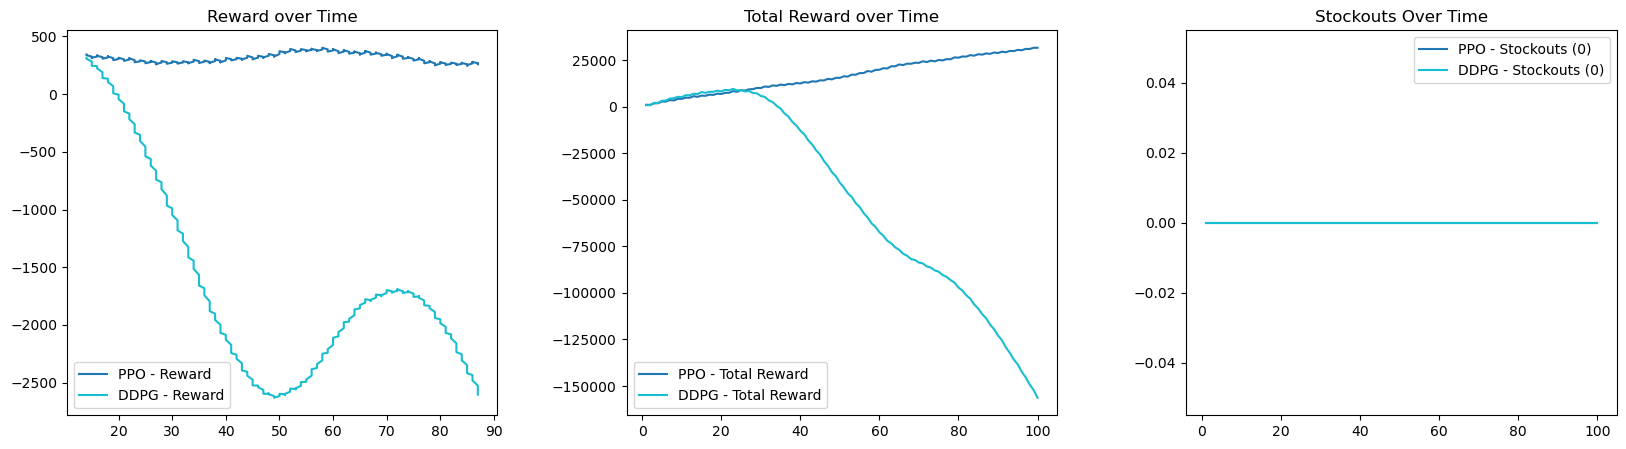

In [13]:
benchmark_plot(df_rl, label_rl)

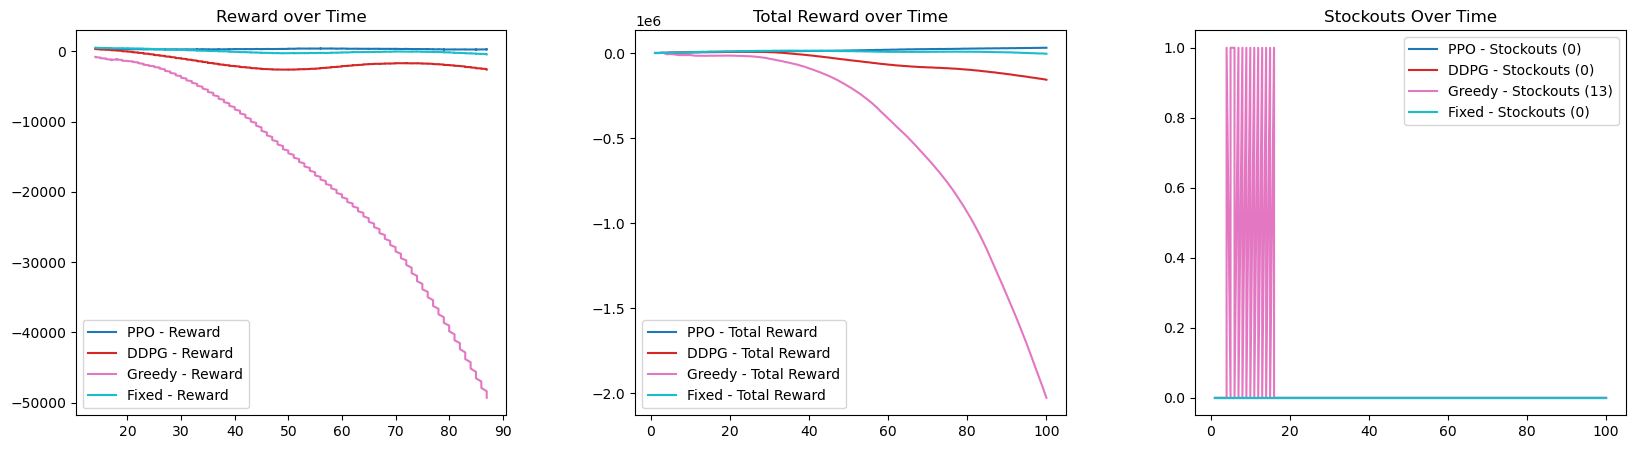

In [14]:
benchmark_plot(df_all, labels_all)

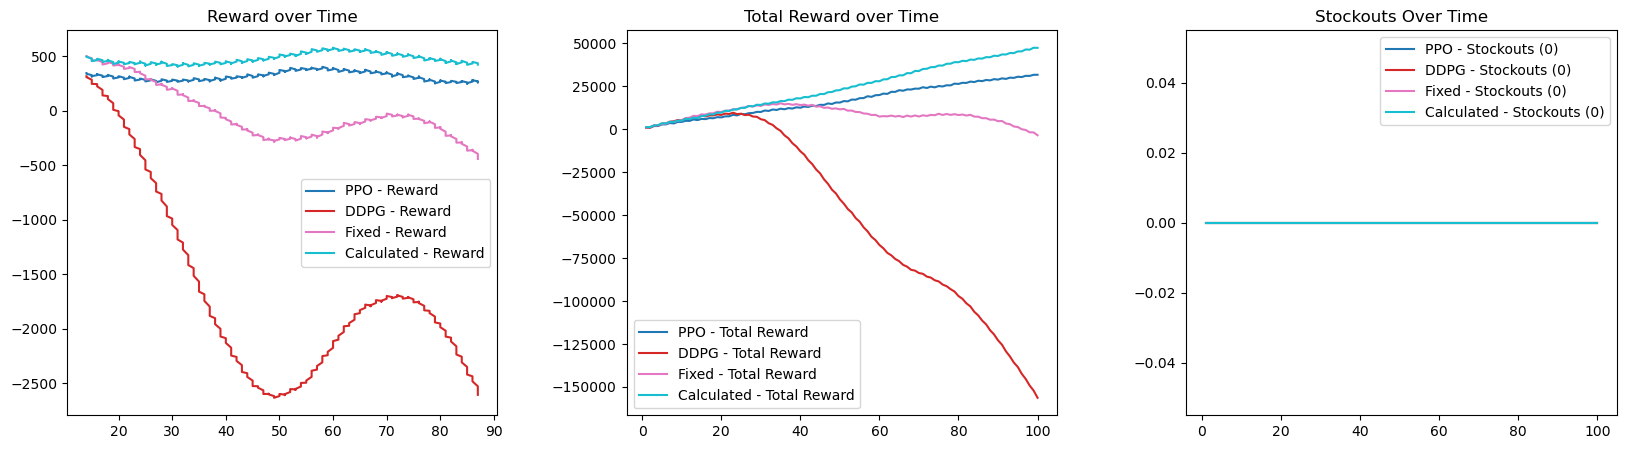

In [15]:
benchmark_plot(df_list, labels)

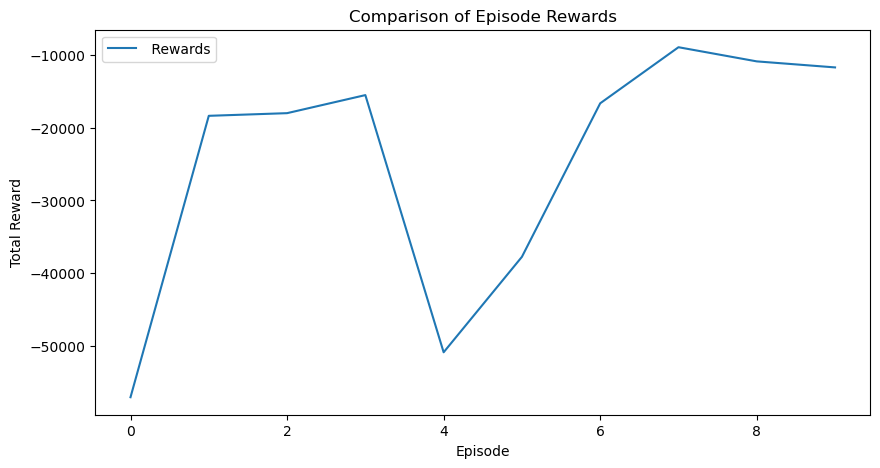

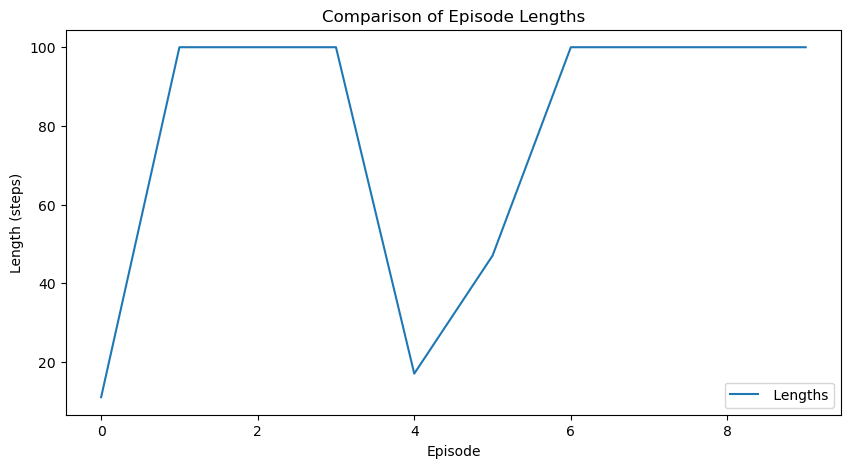

In [23]:
# Function to load data from a JSON file
def load_data(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# List of file paths to compare
file_paths = ["./Data/Evaluation/evaluation_results_calculated.json", 
              "./Data/Evaluation/evaluation_results_ppo.json"
              ]

# Dictionary to store data from each file
comparison_data = {}

for file_path in file_paths:
    # Extract the base name (e.g., results_1) for labeling
    label = file_path.split(".")[0]
    data = load_data(file_path)
    
    # Extract rewards and lengths for each file
    rewards = [entry["score"] for entry in data]
    lengths = [entry["timesteps"] for entry in data]
    
    # Store the data for comparison
    comparison_data[label] = {"rewards": rewards, "lengths": lengths}


# Plot the rewards comparison
plt.figure(figsize=(10, 5))
for label, data in comparison_data.items():
    plt.plot(data["rewards"], label=f"{label} Rewards")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Comparison of Episode Rewards")
plt.legend()
plt.show()

# Plot the episode lengths comparison
plt.figure(figsize=(10, 5))
for label, data in comparison_data.items():
    plt.plot(data["lengths"], label=f"{label} Lengths")
plt.xlabel("Episode")
plt.ylabel("Length (steps)")
plt.title("Comparison of Episode Lengths")
plt.legend()
plt.show()

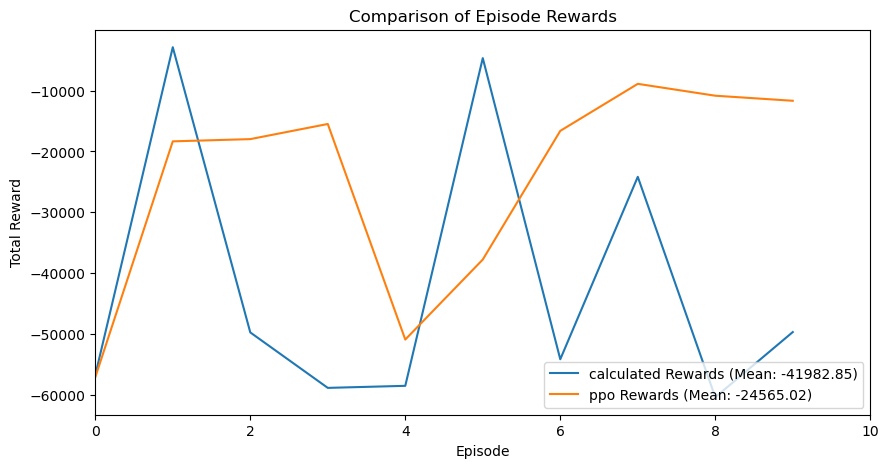

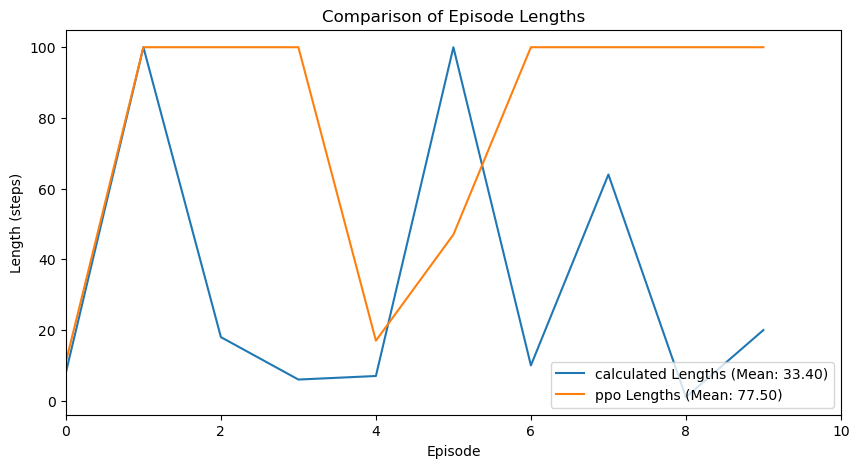

In [30]:
import json
import os
import matplotlib.pyplot as plt

# Function to load data from a JSON file
def load_data(file_path):
    with open(file_path, "r") as file:
        return json.load(file)

# List of file paths to compare
file_paths = ["./Data/Evaluation/evaluation_results_calculated.json", 
              "./Data/Evaluation/evaluation_results_ppo.json"
              ]

# Dictionary to store data from each file
comparison_data = {}

for file_path in file_paths:
    # Extract the base name without extension for labeling
    label = os.path.splitext(os.path.basename(file_path))[0].split("_")[-1]
    data = load_data(file_path)

    # Handle different file formats
    if isinstance(data, dict):  # File with "episode_rewards" and "episode_lengths"
        rewards = data["episode_rewards"]
        lengths = data["episode_lengths"]
    elif isinstance(data, list):  # Standardized file format
        rewards = [entry["score"] for entry in data]
        lengths = [entry["timesteps"] for entry in data]
    else:
        raise ValueError(f"Unknown data format in file: {file_path}")

    # Store the data for comparison
    comparison_data[label] = {"rewards": rewards, "lengths": lengths}

# Plot the rewards comparison
plt.figure(figsize=(10, 5))
for label, data in comparison_data.items():
    rewards = data["rewards"]
    mean_reward = sum(rewards) / len(rewards)
    plt.plot(rewards, label=f"{label} Rewards (Mean: {mean_reward:.2f})")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.title("Comparison of Episode Rewards")
plt.xlim(0, 10)
plt.legend(loc="lower right")
plt.show()

# Plot the episode lengths comparison
plt.figure(figsize=(10, 5))
for label, data in comparison_data.items():
    lengths = data["lengths"]
    mean_length = sum(lengths) / len(lengths)
    plt.plot(lengths, label=f"{label} Lengths (Mean: {mean_length:.2f})")
plt.xlabel("Episode")
plt.ylabel("Length (steps)")
plt.title("Comparison of Episode Lengths")
plt.xlim(0, 10)
plt.legend(loc="lower right")
plt.show()